#  EDA

## ¿Qué es?

EDA (Exploratory Data Anlayisis) nos permite analizar los datos que tenemos de manera intuitiva y grafíca.

Una definición formal es:

>En estadística, el análisis exploratorio de datos es un enfoque para analizar conjuntos de datos para resumir sus principales características, a menudo con métodos visuales. Se puede usar o no un modelo estadístico, pero principalmente EDA es para ver qué nos pueden decir los datos.

Basandonos en este anlísis podemos empezar a tomar algunas decisiones en la estructuración de los datos y en la definición de los modelos a utilizar:

* si la hacemos bien podemos ahorrarnos mucho trabajo
* si la hacemos mal arriesgamos a perder información valiosa

Tenemos 5 fases principales en el EDA:

1. Recompilación y carga de datos
2. Limpieza datos
3. Analísis univariada
4. Analísis bivariada
5. Analísis multivariada

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy.stats as stats
warnings.filterwarnings("ignore")
%matplotlib inline

### 1. Recompilación y carga de datos

In [39]:
db=pd.read_csv("Marketing_Analysis.csv", sep=';', low_memory=False)

In [40]:
db.shape

(45211, 19)

In [41]:
db.head(5)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [42]:
db.set_index("customerid", inplace=  True)

In [43]:
db.head(10)

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
customerid,,,,,,,,,,,,,,,,,,
1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
6,35.0,100000,231,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",139 sec,1,-1,0,unknown,no
7,28.0,100000,447,single,"management,tertiary",no,no,yes,yes,unknown,5,"may, 2017",217 sec,1,-1,0,unknown,no
8,42.0,120000,2,divorced,"entrepreneur,tertiary",no,yes,yes,no,unknown,5,"may, 2017",380 sec,1,-1,0,unknown,no
9,58.0,55000,121,married,"retired,primary",yes,no,yes,no,unknown,5,"may, 2017",50 sec,1,-1,0,unknown,no


In [44]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 1 to 45211
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       45191 non-null  float64
 1   salary    45211 non-null  int64  
 2   balance   45211 non-null  int64  
 3   marital   45211 non-null  object 
 4   jobedu    45211 non-null  object 
 5   targeted  45211 non-null  object 
 6   default   45211 non-null  object 
 7   housing   45211 non-null  object 
 8   loan      45211 non-null  object 
 9   contact   45211 non-null  object 
 10  day       45211 non-null  int64  
 11  month     45161 non-null  object 
 12  duration  45211 non-null  object 
 13  campaign  45211 non-null  int64  
 14  pdays     45211 non-null  int64  
 15  previous  45211 non-null  int64  
 16  poutcome  45211 non-null  object 
 17  response  45181 non-null  object 
dtypes: float64(1), int64(6), object(11)
memory usage: 6.6+ MB


In [45]:
db.columns

Index(['age', 'salary', 'balance', 'marital', 'jobedu', 'targeted', 'default',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

Ahora si nada más checkamos valores null:

In [46]:
db.isnull().sum()

,0
age,20
salary,0
balance,0
marital,0
jobedu,0
targeted,0
default,0
housing,0
loan,0
contact,0


### 2. Limpieza datos

Ahora procedemos a la limpieza de los Datos:

1. Eliminamos eventuales columnas o filas
2. Unimos columnas para entender mejor los datos
3. Dividimos otras columnas
4. Averiguamos que todos las columnas tengan nombre y sobre todo el indice


In [47]:
db.head(10)

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
customerid,,,,,,,,,,,,,,,,,,
1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
6,35.0,100000,231,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",139 sec,1,-1,0,unknown,no
7,28.0,100000,447,single,"management,tertiary",no,no,yes,yes,unknown,5,"may, 2017",217 sec,1,-1,0,unknown,no
8,42.0,120000,2,divorced,"entrepreneur,tertiary",no,yes,yes,no,unknown,5,"may, 2017",380 sec,1,-1,0,unknown,no
9,58.0,55000,121,married,"retired,primary",yes,no,yes,no,unknown,5,"may, 2017",50 sec,1,-1,0,unknown,no


¿Qué notamos?

In [48]:
db['job']= db["jobedu"].apply(lambda x: x.split(",")[0])
db['education']= db["jobedu"].apply(lambda x: x.split(",")[1])
db

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
customerid,,,,,,,,,,,,,,,,,,,,
1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary


In [49]:
db.drop(labels='jobedu', axis = 1, inplace = True)
db

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
customerid,,,,,,,,,,,,,,,,,,,
1,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
2,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
3,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
4,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
5,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45207,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45208,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45209,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary


Ahora manejamos los valores faltantes, podemos tener de tres tipos:

1. MCAR(Missing completely at random): no dependen de alguna caracteristica en particular
2. MAR(Missing at random): pueden depender de alguna caracteristica
3. MNAR(Missing not at random): hay alguna razón para faltar

Droppamos todos lo que no tienen edad definida:

In [50]:
db = db[~db.age.isnull()].copy()
db.isnull().sum()
db.shape

(45191, 19)

Ahora imputamos los valores para los meses:

In [51]:
month_mode = db.month.mode()[0]
month_mode

'may, 2017'

Ahora procedemos a substituir este valor en nuestra columna con faltante:

In [52]:
db.month.fillna(month_mode, inplace = True)
db.month.isnull().sum()

np.int64(0)

Ahora manejamos los faltantes en nuestra variable dependiente *(response)*:

In [53]:
db = db[~db.response.isnull()].copy()
db.isnull().sum()

,0
age,0
salary,0
balance,0
marital,0
targeted,0
default,0
housing,0
loan,0
contact,0
day,0


Podriamos sobstituir nuestro valores faltantes con **NaN** para que no haya afectaciones cuando procedemos al analisís estadistico

#### 3. Analisis univariado de variable categorica no ordenada

* no tienen peso o medida
* no tienen orden

#### Outliers

1. Outlier univariado
2. Outlier multivariado/bivariado: cuando ploteamos una variable con otra el valor se aleja del valor esperado de manera anormal

Antes de proceder a eso tenemos que estandardizar los valores para que escalas diferentes no nos lleven a conclusiones equivocadas. Tenemos diferentes tipologias de datos que podemos encontrar

In [54]:
db.job.value_counts()

,count
job,
blue-collar,9722
management,9451
technician,7589
admin.,5165
services,4148
retired,2262
self-employed,1574
entrepreneur,1484
unemployed,1302


In [55]:
db.job.value_counts(normalize=True)

,proportion
job,
blue-collar,0.215274
management,0.209273
technician,0.168043
admin.,0.114369
services,0.091849
retired,0.050087
self-employed,0.034853
entrepreneur,0.032860
unemployed,0.028830


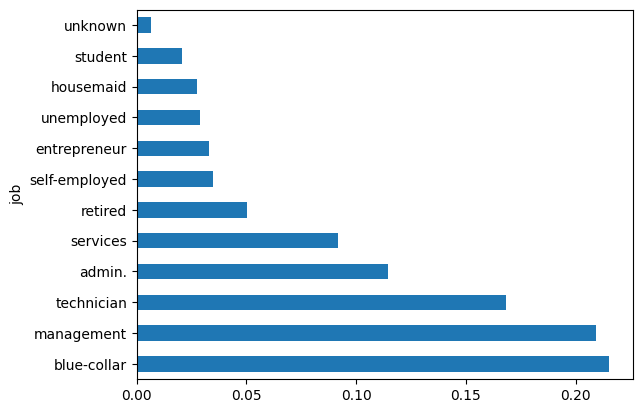

In [56]:
db.job.value_counts(normalize=True).plot.barh()
plt.show()

#### Analisis univariada Variable categorica ordenada

Estas variables tienen un orden natural, por ejemplo:

* Meses
* Educación

In [57]:
db.education.value_counts(normalize=True)


,proportion
education,
secondary,0.513275
tertiary,0.294192
primary,0.151436
unknown,0.041097


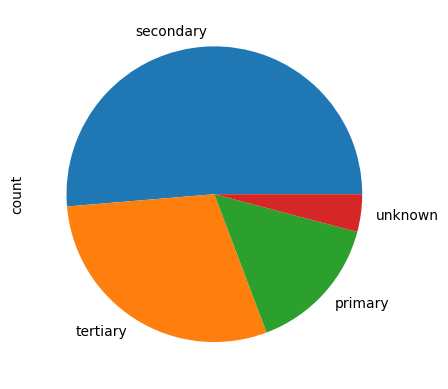

In [58]:
db.education.value_counts().plot.pie()
plt.show()

Si tenemos una variable con valores numericos podemos calcular

In [59]:
db.salary.describe()


,salary
count,45161.000000
mean,57004.849317
std,32087.698810
min,0.000000
25%,20000.000000
50%,60000.000000
75%,70000.000000
max,120000.000000


Finalmente podemos plotear una densidad de la distribución de la variable numérica:

<Axes: xlabel='salary', ylabel='Density'>

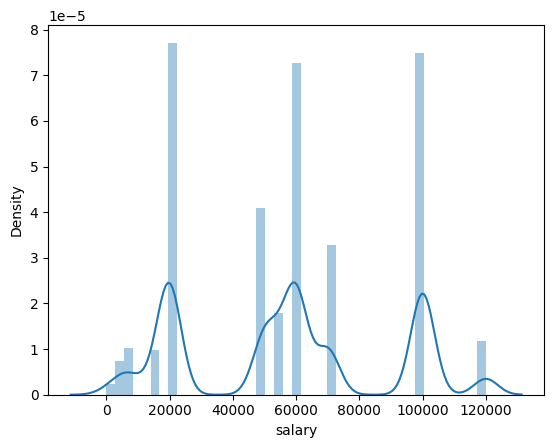

In [60]:
sns.distplot(db['salary'])

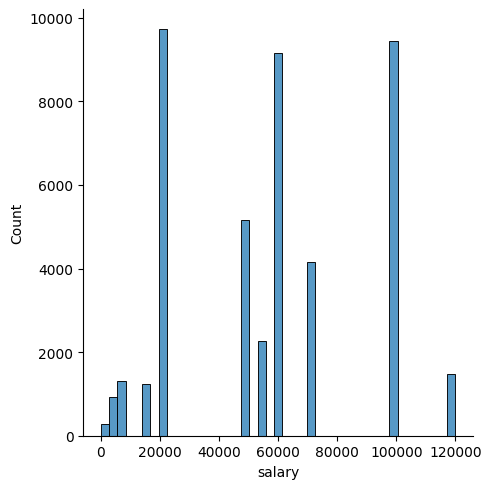

In [61]:
sns.displot(db['salary'])

(0.0, 3000.0)

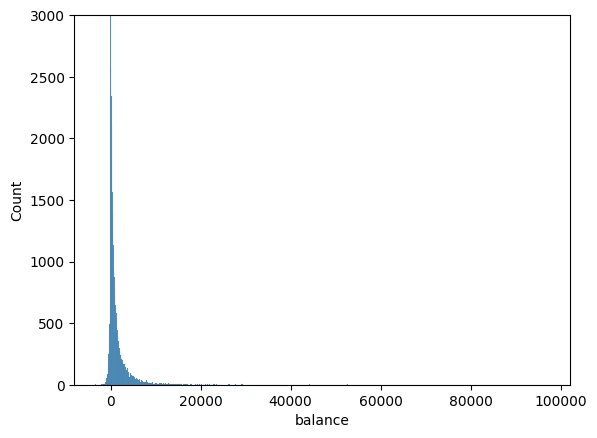

In [62]:
sns.histplot(db['balance'])
plt.xlim(-8019, 102127)
plt.ylim(0,3000)

In [63]:
db.balance.describe()

,balance
count,45161.000000
mean,1362.850690
std,3045.939589
min,-8019.000000
25%,72.000000
50%,448.000000
75%,1428.000000
max,102127.000000


### 4. Analisis bivariado

Cuando hacemos un analisis bivariado el uso de graficas nos puede ser extremadamente utíl. En particular:

* scatter plot
* pair plot
* matriz de correlación


#### Scatter plot

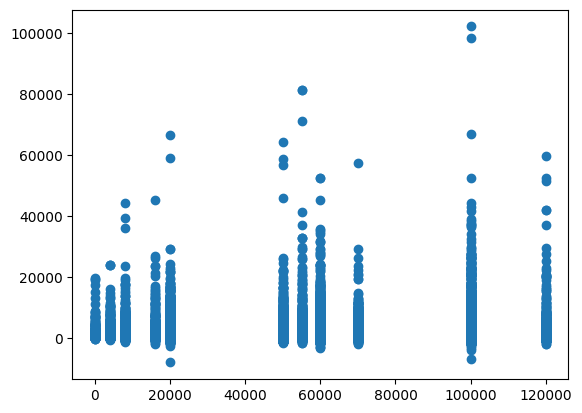

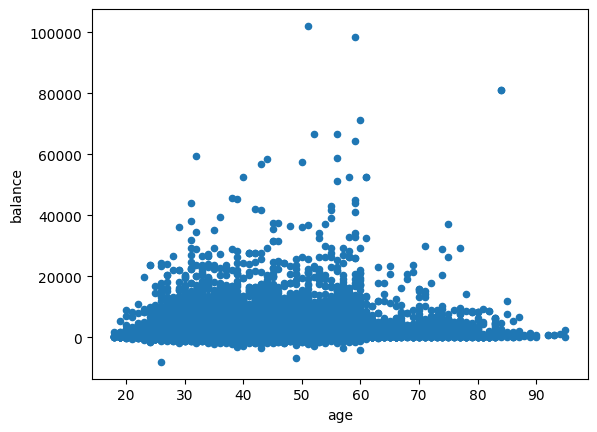

In [64]:
plt.scatter(db.salary,db.balance)
plt.show()

db.plot.scatter(x="age",y="balance")
plt.show()

#### Pair plot

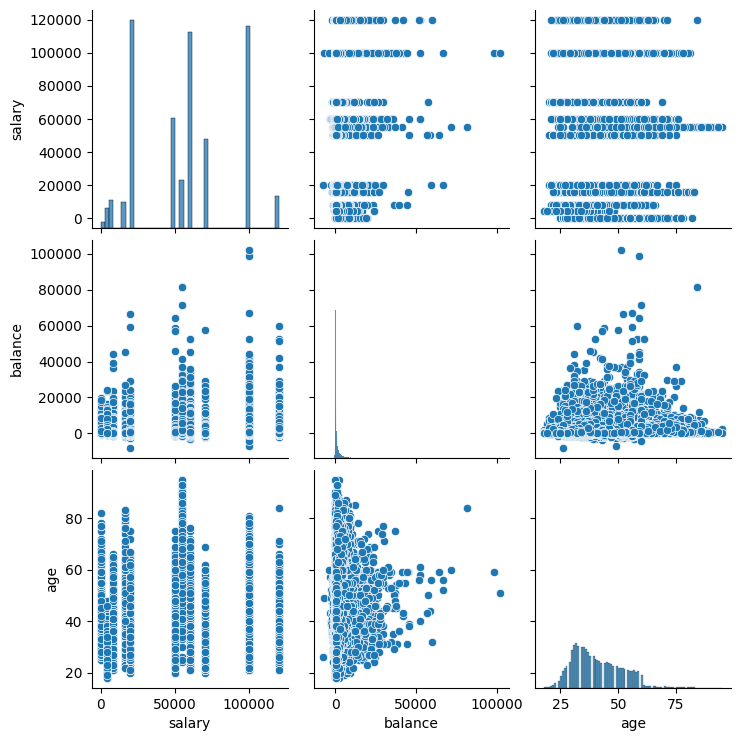

In [65]:
sns.pairplot(data = db, vars=['salary','balance','age'])
plt.show()

#### Matríz de correlación

Se utiliza cuando queremos ver en un único gráfico las relaciones entre más de una variable de forma sintética

In [66]:
db[['age','salary','balance']].corr()

,age,salary,balance
age,1.000000,0.024513,0.097710
salary,0.024513,1.000000,0.055489
balance,0.097710,0.055489,1.000000


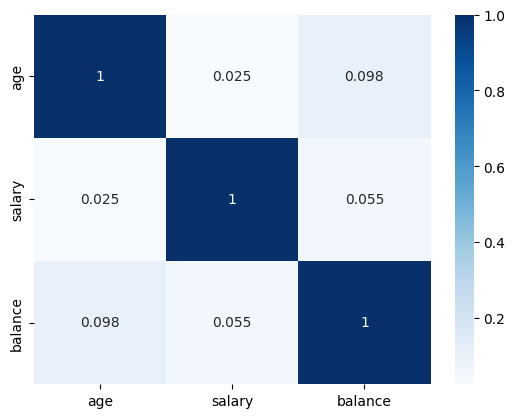

In [67]:
sns.heatmap(db[['age','salary','balance']].corr(), annot=True, cmap = 'Blues')
plt.show()

#### Variables Categoricas Numéricas

Normalmente se analizan con base en su media o mediana.
Un instrumento particularmente útil es el *boxplot*.

In [68]:
db.groupby('response')['salary'].mean()


,salary
response,
no,56769.510482
yes,58780.510880


In [69]:
db.groupby('response')['salary'].median()

,salary
response,
no,60000.0
yes,60000.0


Pareciera no haber grandes diferencias, pero analizando los boxplot descubrimos que:

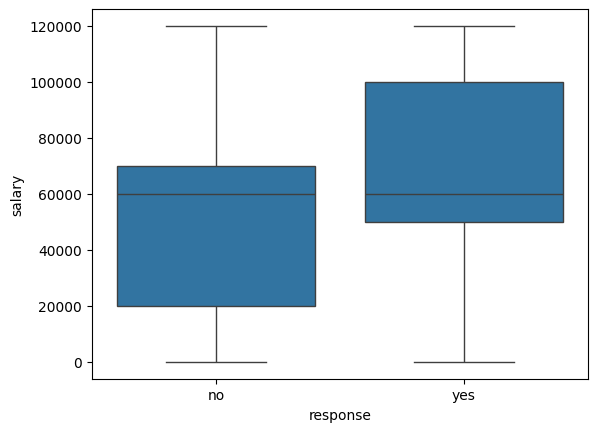

In [70]:
sns.boxplot(x=db.response, y=db.salary)
plt.show()

#### Analisis variables categoricas

Queremos analizar como diferentes variables categoricas (como la educación) tienen impacto en la variable dependiente. Para hacer esto necesitamos convertir *response* en una variable binaria.

In [71]:
db['response_rate'] = np.where(db.response=='yes',1,0)
db.response_rate.value_counts()

,count
response_rate,
0,39876
1,5285


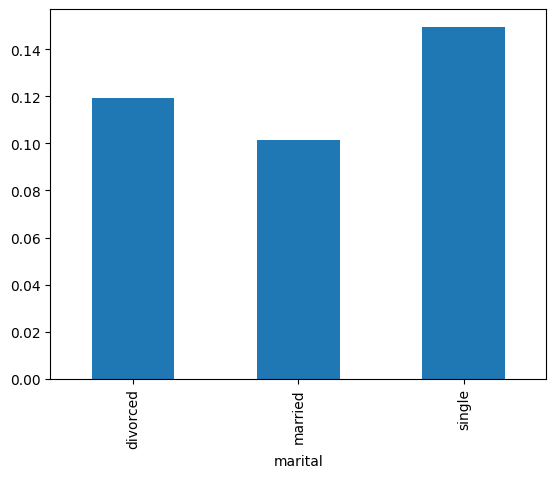

In [72]:
db.groupby('marital')['response_rate'].mean().plot.bar()
plt.show()

### 5. Analisis multivariado

Antes tenemos que crear una tabla pivot donde las columnas representen los diferentes estados civiles:

In [73]:
result = pd.pivot_table(data=db, index='education', columns='marital',values='response_rate')
result

marital,divorced,married,single
education,,,
primary,0.138852,0.075601,0.106808
secondary,0.103559,0.094650,0.129271
tertiary,0.137415,0.129835,0.183737
unknown,0.142012,0.122519,0.162879


Ahora vamos a ver un mapa de calor.

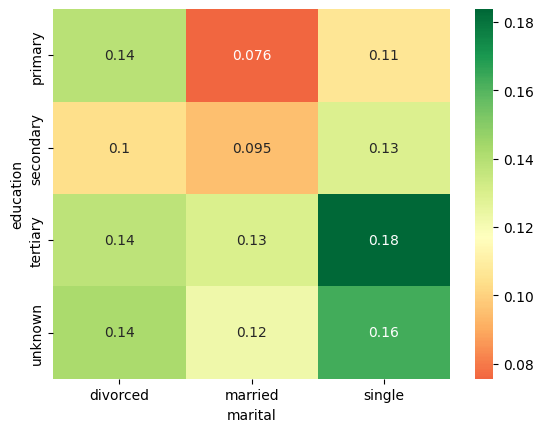

In [74]:
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()